## Import Libraries

In [46]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [50]:
df = pd.read_csv("final_data_eda.csv")

In [52]:
df.shape

(9377, 21)

In [58]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
1,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,2


In [102]:
#df.drop(columns='Unnamed: 0' , inplace = True)
df.drop(columns='name' , inplace = True)


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [25]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [26]:
# Completeness
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [27]:
# Accurecy types
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [28]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']
numeric_features = ['Year', 'Engine_Size', 'Mileage']

In [80]:
for i in categorical_features:
    print(df[i].value_counts())

Type
Accent          141
Camry           127
Land Cruiser    116
Hilux           101
Sonata           98
               ... 
Liberty           1
SL                1
EC8               1
Envoy             1
301               1
Name: count, Length: 232, dtype: int64
Region
Riyadh            1434
Dammam             676
Jeddah             444
Al-Medina           97
Al-Ahsa             94
Qassim              88
Makkah              63
Aseer               62
Khobar              44
Taef                33
Jubail              29
Tabouk              26
Jazan               25
Abha                23
Hail                17
Al-Baha             13
Yanbu               11
Hafar Al-Batin      10
Najran              10
Al-Jouf              7
Al-Namas             7
Wadi Dawasir         4
Arar                 4
Sakaka               4
Besha                3
Qurayyat             2
Sabya                1
Name: count, dtype: int64
Make
Toyota        761
Hyundai       449
Ford          308
Chevrolet     255
Nissa

In [81]:
# Calculate the frequency of each 'Type'
type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [48]:
df.head(2)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000


In [82]:
df.shape

(3205, 11)

In [83]:
# Calculate the frequency of each 'Make'
make_counts = df['Make'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [84]:
df.shape

(3205, 11)

In [15]:
#df[df['Type']=='Other']

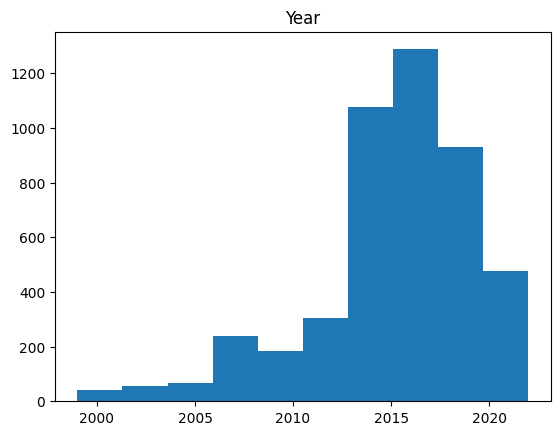

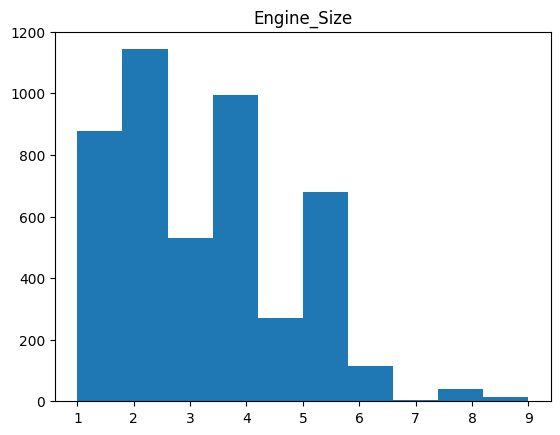

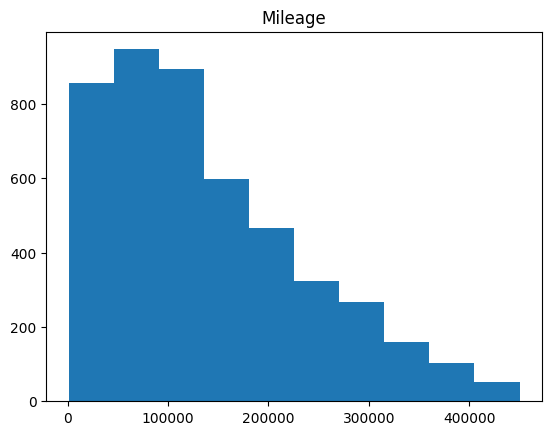

In [72]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [56]:
df.shape

(5526, 11)

In [57]:
df = df[df['Year']>=1999]

In [58]:
df.shape

(5397, 11)

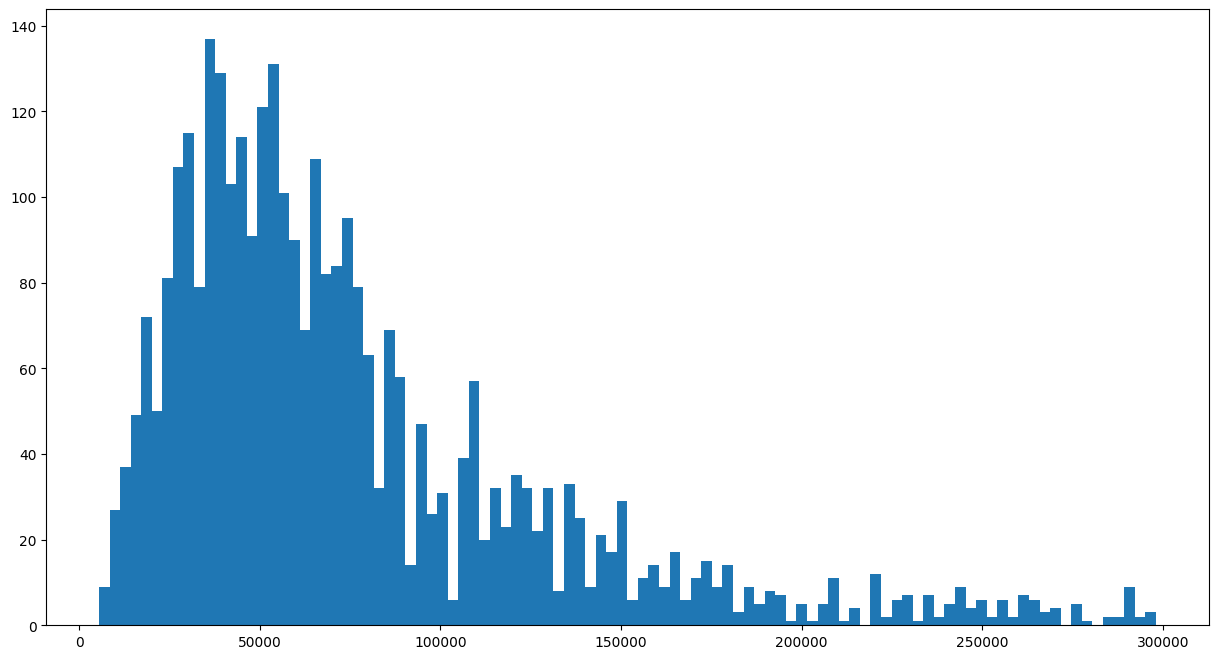

In [76]:
plt.figure(figsize=(15,8))
#plt.hist(df['Price']);
plt.hist(df[(df['Price']<=300000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [78]:
df = df[(df['Price']<=300000) & (df['Price']>=5000)]

In [79]:
df.shape

(3231, 11)

In [19]:
#df[df['Mileage']<1000]

In [67]:
df['Mileage'].min()

100

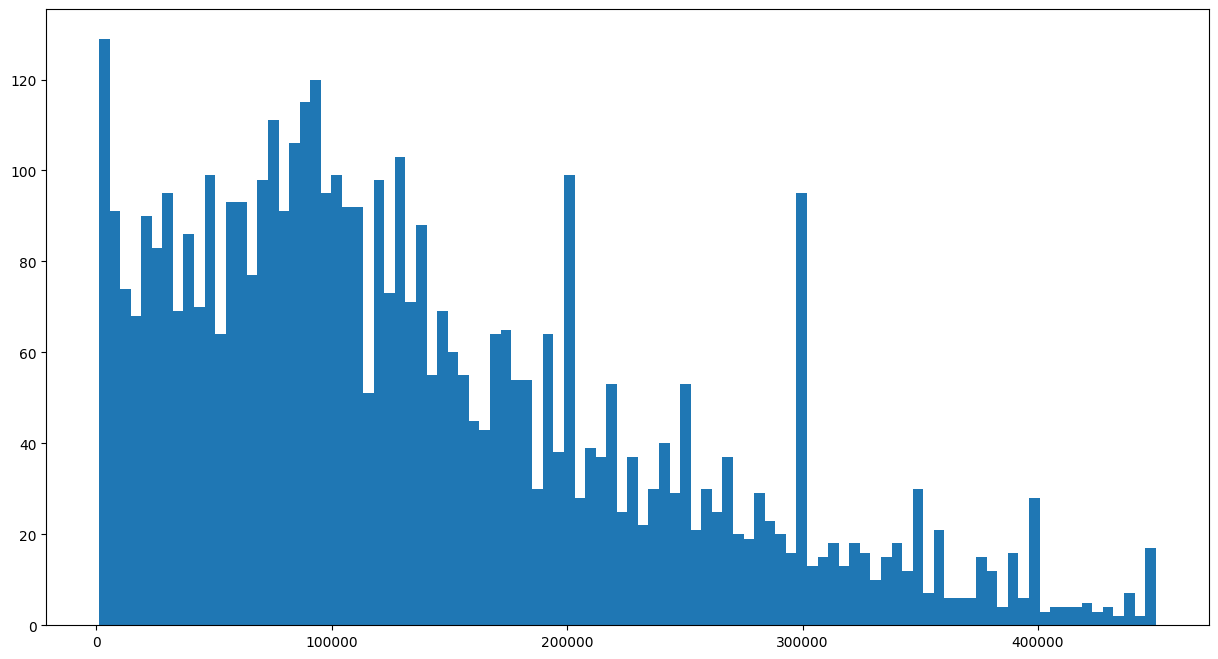

In [69]:
plt.figure(figsize=(15,8))
#plt.hist(df['Mileage']);
plt.hist(df[(df['Mileage']<=450000) & (df['Mileage']>1000)]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [71]:
df = df[(df['Mileage']<=450000) & (df['Mileage']>1000)]
df.shape

(4667, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [104]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,2


In [106]:
categorical_features

NameError: name 'categorical_features' is not defined

In [108]:
# one hot coding
df = pd.get_dummies(df, columns= categorical_features)

NameError: name 'categorical_features' is not defined

In [84]:
df.shape

(9377, 20)

In [86]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
1,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,2


#### 3. Feature selection

In [27]:
# sns.heatmap(df.corr(), annot=True);

In [110]:
correlation = df.corr()
print(correlation['highest_value'].sort_values(ascending=False))

ValueError: could not convert string to float: 'Manchester United'

In [90]:
# Set the correlation threshold
threshold = 0.25  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['highest_value']) > threshold]['highest_value'].index
selected_features

Index(['Year', 'Engine_Size', 'Mileage', 'Price', 'Type_Land Cruiser',
       'Make_Mercedes', 'Options_Full', 'Options_Standard'],
      dtype='object')

In [91]:
selected_features = []

In [112]:
df = df[selected_features]
df.head()

NameError: name 'selected_features' is not defined

#### 4. Prepare train and test data

In [94]:
# Prepare data
X = df.drop(['highest_value'], axis=1)
y = df['highest_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
X.shape

(3205, 7)

## Buliding the Model

In [97]:
model = LinearRegression()

## Train the Model

In [98]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [99]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [101]:
model.coef_

array([ 21777.55744231,  22235.35505758, -10630.11780667,  13263.71599241,
        14255.73313722,   8028.35476216,  -4923.35316327])

In [114]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'model' is not defined

In [116]:
print(model.intercept_) 

NameError: name 'model' is not defined

In [118]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'lasso_model' is not defined

## Evaluating the Model 

1. Mean Square Error

In [52]:
y_base = [y_train.mean()] * len(y_test)

In [60]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 3525053139.6218147


In [48]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 1291203369.7082233
Mean Squared Error for testing: 1291014311.7357974


2. Mean Absolute Error

In [54]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 42200.97317509818


In [55]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 24397.66499302171
Mean Absolute Error for testing: 25186.715154450434


3. Root Mean Squared Error

In [61]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 59372.157949848974


In [62]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 35933.31837874458
Root Mean Squared Error for testing: 35930.687604550476


4. R Square

In [63]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.597025797763749
R Square for testing: 0.6333064542453376


#### Predictions vs. Real Values

In [100]:
predictions = model.predict(X_test_scaled)
#predictions

In [40]:
Real_Values = np.array(y_test)
#Real_Values

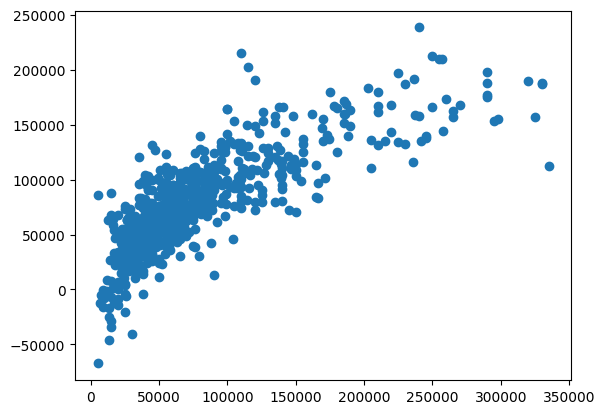

In [41]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

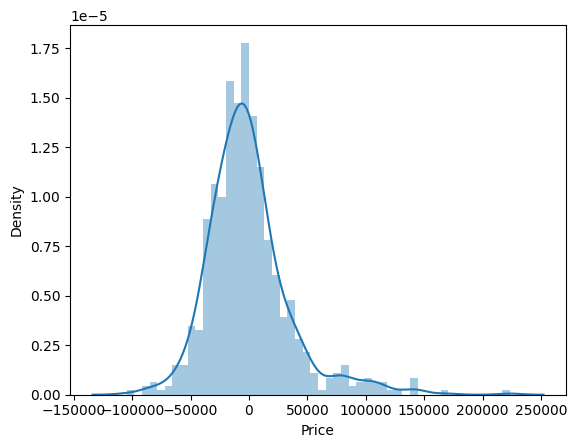

In [42]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution